# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Fine Tuning LLM with HuggingFace Transformers for NLP**](https://www.udemy.com/course/fine-tuning-llm-with-hugging-face-transformers/?referralCode=6DEB3BE17C2644422D8E) | Learn how to fine tune LLM with custom dataset. You will learn basics of transformers then fine tune LLM|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like HuggingFace Transformers, Streamlit, FastAPI, Docker and NGINX|
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


# Boto 3 for S3 Tutorial in Python

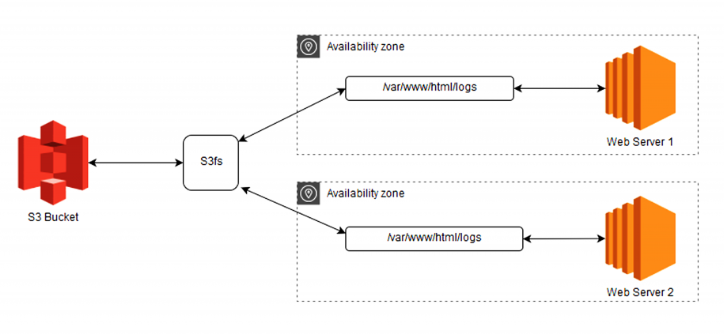

## List S3 Buckets and Create an S3 Bucket

In [8]:
import boto3

s3 = boto3.client('s3')

bucket_name = 'somerandomkgptalkie'

In [9]:
response = s3.list_buckets()

In [10]:
def create_bucket(bucket_name):
    s3.create_bucket(Bucket=bucket_name)
    print("Bucket is created")

create_bucket(bucket_name)

Bucket is created


## Upload a Single File to S3

In [11]:
import os

def upload_file(file_path, object_name=None):
    if object_name is None:
        object_name = os.path.basename(file_path)

    s3.upload_file(file_path, bucket_name, object_name)


In [12]:
upload_file('data/index.html')

In [13]:
upload_file('data/index.html', 'somefile.html')

## List all objects in a bucket

- list all objects in a bucket

In [17]:
def list_objects():
    response = s3.list_objects_v2(Bucket=bucket_name)
    for obj in response['Contents']:
        print(obj['Key'])

list_objects()

index.html
somefile.html


## Download S3 File to Local System

In [18]:
def download_file(object_name, file_path):
    if not os.path.exists(os.path.dirname(file_path)):
        os.makedirs(os.path.dirname(file_path))

    s3.download_file(bucket_name, object_name, file_path)


download_file('index.html', 'data_download/index.html')

## Upload a Folder to S3

In [27]:
def upload_directory(directory_path, s3_prefix):
    for root, dirs, files in os.walk('data'):
        for file in files:
            file_path = os.path.join(root, file).replace("\\", "/")
            relpath = os.path.relpath(file_path, directory_path)
            s3_key = os.path.join(s3_prefix, relpath).replace("\\", "/")
            
            s3.upload_file(file_path, bucket_name, s3_key)

upload_directory('data', 's3_data')

## Download S3 Folder to Local System

In [39]:
local_path = 's3_download_1'
s3_prefix = 's3_data'

def download_dir(local_path, s3_prefix):
    os.makedirs(local_path, exist_ok=True)
    paginator = s3.get_paginator('list_objects_v2')
    for result in paginator.paginate(Bucket=bucket_name, Prefix=s3_prefix):
        if 'Contents' in result:
            for key in result['Contents']:
                s3_key = key['Key']

                local_file = os.path.join(local_path, os.path.relpath(s3_key, s3_prefix))
                # os.makedirs(os.path.dirname(local_file), exist_ok=True)

                s3.download_file(bucket_name, s3_key, local_file)



download_dir(local_path, s3_prefix)

## Delete All Files in an S3 Bucket

In [41]:
def delete_objects():
    response = s3.list_objects_v2(Bucket=bucket_name)

    if 'Contents' in response:

        for obj in response['Contents']:
            s3.delete_object(Bucket=bucket_name, Key=obj['Key'])



delete_objects()

In [43]:
s3.delete_bucket(Bucket=bucket_name)

{'ResponseMetadata': {'RequestId': 'CBTACZKXAATTRTJG',
  'HostId': 'qoABIb1S0zwptxhrhxbKYNKEpwGqiNNQ+ZFqRbA9MVQJRiEC3eevLTP3F+v15VwQFjfSEmzUf0I=',
  'HTTPStatusCode': 204,
  'HTTPHeaders': {'x-amz-id-2': 'qoABIb1S0zwptxhrhxbKYNKEpwGqiNNQ+ZFqRbA9MVQJRiEC3eevLTP3F+v15VwQFjfSEmzUf0I=',
   'x-amz-request-id': 'CBTACZKXAATTRTJG',
   'date': 'Thu, 25 Jul 2024 11:35:28 GMT',
   'server': 'AmazonS3'},
  'RetryAttempts': 0}}